In [1]:
from mxnet import nd
import mxnet as mx
import numpy as np

In [2]:
nd.array(((1,2,3),(4,5,7)))


[[1. 2. 3.]
 [4. 5. 7.]]
<NDArray 2x3 @cpu(0)>

In [3]:
x = nd.ones(shape=(2,3))
x


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>

In [4]:
y = nd.random.uniform(low=-1, high=1, shape=(2,3))
y


[[0.09762704 0.18568921 0.43037868]
 [0.6885315  0.20552671 0.71589124]]
<NDArray 2x3 @cpu(0)>

In [5]:
(x.shape, x.size, x.dtype, x.context)

((2, 3), 6, numpy.float32, cpu(0))

In [6]:
nd.ones((2,3), dtype=np.uint8)


[[1 1 1]
 [1 1 1]]
<NDArray 2x3 @cpu(0)>

In [7]:
y.astype(np.float16)


[[0.09766 0.1857  0.4304 ]
 [0.6885  0.2056  0.716  ]]
<NDArray 2x3 @cpu(0)>

In [8]:
nd.ones((2,3), ctx=mx.cpu())


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>

In [9]:
import time

In [10]:
tic = time.time()
x_np, y_np =  np.ones((1000,5000)), np.ones((5000, 1000))

In [11]:
x_nd_c, y_nd_c = nd.ones((10000,5000)), nd.ones((5000,1000))

In [12]:
(x_nd_c.shape, y_nd_c.shape)

((10000, 5000), (5000, 1000))

In [13]:
x_nd_c


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
<NDArray 10000x5000 @cpu(0)>

In [14]:
tic = time.time()
np.dot(x_np, y_np)
print('Numpy time {:.4f}s'.format(time.time() - tic))

Numpy time 0.2667s


In [15]:
tic = time.time()
nd.dot(x_nd_c, y_nd_c)
print('Mxnet time {:.4f}s'.format(time.time() - tic))

Mxnet time 0.0006s


In [16]:
a = x.asnumpy()

In [17]:
(type(a),a)

(numpy.ndarray, array([[1., 1., 1.],
        [1., 1., 1.]], dtype=float32))

In [18]:
a_nd = nd.array(a)

In [19]:
(type(a_nd),a_nd)

(mxnet.ndarray.ndarray.NDArray, 
 [[1. 1. 1.]
  [1. 1. 1.]]
 <NDArray 2x3 @cpu(0)>)

In [20]:
x = mx.nd.random.uniform(shape=(2,3))
y = mx.nd.full(shape=(2,3), val=2)
(x,y)

(
 [[0.5448832 0.8472517 0.4236548]
  [0.6235637 0.6458941 0.3843817]]
 <NDArray 2x3 @cpu(0)>, 
 [[2. 2. 2.]
  [2. 2. 2.]]
 <NDArray 2x3 @cpu(0)>)

In [21]:
x*y


[[1.0897664 1.6945034 0.8473096]
 [1.2471274 1.2917882 0.7687634]]
<NDArray 2x3 @cpu(0)>

In [22]:
y.exp()


[[7.389056 7.389056 7.389056]
 [7.389056 7.389056 7.389056]]
<NDArray 2x3 @cpu(0)>

In [23]:
import matplotlib.pyplot as plt

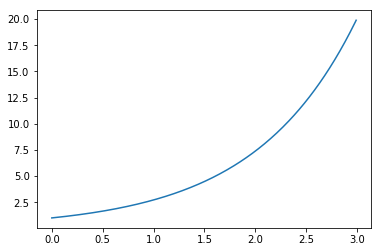

In [24]:
o = plt.plot(np.arange(0,3,0.01), nd.arange(0,3,0.01).exp().asnumpy())

In [25]:
x.shape, y.shape

((2, 3), (2, 3))

In [26]:
nd.dot(x, y.T)


[[3.6315794 3.6315794]
 [3.3076792 3.3076792]]
<NDArray 2x2 @cpu(0)>

In [27]:
x[:, 1:3]


[[0.8472517 0.4236548]
 [0.6458941 0.3843817]]
<NDArray 2x2 @cpu(0)>

In [28]:
y[1:2, 0:2]


[[2. 2.]]
<NDArray 1x2 @cpu(0)>

In [29]:
from mxnet.gluon import nn

In [30]:
layer = nn.Conv2D(channels=1,
                 kernel_size=(3,3),
                 in_channels=1,
                 strides=(1,1),
                 padding=(0,0),
                 activation='relu',
                 prefix='conv_')
layer

Conv2D(1 -> 1, kernel_size=(3, 3), stride=(1, 1), Activation(relu))

In [31]:
l = layer.initialize(mx.init.Constant([[-1,0,1],
                                      [-2,0,2],
                                      [-1,0,1]]))

In [32]:
!ls

dog.jpg					mx_net_obj_classification.ipynb
imageclassification_caltech_2020-04-19	mx_net_obj_detection.ipynb
lost+found				mx_net_obj_segmentation.ipynb
mt_baker.jpg				plane-draw.jpeg
mx_net_basic.ipynb


In [33]:
img = mx.image.imread('dog.jpg',0).astype('float32')

In [34]:
image_ch_1 = img.transpose((2,0,1))  

In [35]:
image_ch_1


[[[ 57.  58.  60. ... 100.  60.  66.]
  [ 58.  58.  59. ...  85.  59.  64.]
  [ 58.  58.  59. ...  64.  60.  55.]
  ...
  [167. 167. 170. ...  69.  43.  55.]
  [168. 167. 163. ...  66.  44.  59.]
  [164. 166. 160. ...  67.  40.  42.]]]
<NDArray 1x576x768 @cpu(0)>

In [36]:
img_batch = image_ch_1.expand_dims(axis=0)

In [37]:
op = layer(img_batch)

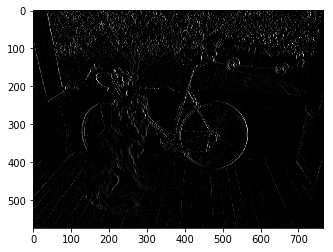

In [38]:
o = plt.imshow(op.squeeze().asnumpy(), cmap='gray')

In [39]:
layer.collect_params()

conv_ (
  Parameter conv_weight (shape=(1, 1, 3, 3), dtype=<class 'numpy.float32'>)
  Parameter conv_bias (shape=(1,), dtype=<class 'numpy.float32'>)
)

In [40]:
layer.collect_params()['conv_weight']

Parameter conv_weight (shape=(1, 1, 3, 3), dtype=<class 'numpy.float32'>)

In [41]:
layer.weight.data()


[[[[-1.  0.  1.]
   [-2.  0.  2.]
   [-1.  0.  1.]]]]
<NDArray 1x1x3x3 @cpu(0)>

In [42]:
layer.bias.data()


[0.]
<NDArray 1 @cpu(0)>

In [43]:
layer = nn.MaxPool2D(pool_size=(4,4))
layer

MaxPool2D(size=(4, 4), stride=(4, 4), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)

In [44]:
pooled = layer(op)

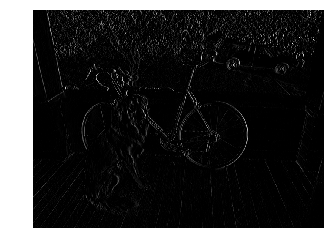

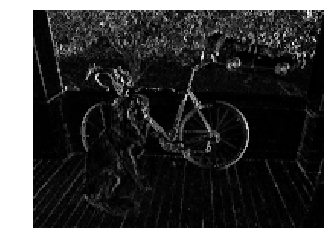

In [45]:
plt.imshow(op.squeeze().asnumpy(), cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(pooled.squeeze().asnumpy(), cmap='gray')
o= plt.axis('off')

In [46]:
layer.collect_params()

pool0_ (

)

In [47]:
layer = nn.Dense(units=10, in_units=3, activation='softmax')
layer

Dense(3 -> 10, Activation(softmax))

In [48]:
layer.initialize(mx.init.One())

In [49]:
ip = mx.nd.ones((1,3))

In [50]:
ip


[[1. 1. 1.]]
<NDArray 1x3 @cpu(0)>

In [51]:
layer.weight.data()


[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
<NDArray 10x3 @cpu(0)>

In [52]:
layer.bias.data()


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<NDArray 10 @cpu(0)>

In [53]:
from mxnet import init,nd

In [54]:
init.Uniform

mxnet.initializer.Uniform

In [55]:
i = init

In [56]:
i.Uniform
i.Normal
i.Xavier
i.Zero
i.One
i.Constant
    

mxnet.initializer.Constant

In [57]:
l = nn.Conv2D(channels=1, in_channels=1, kernel_size=(3,3))

In [58]:
l.initialize(i.Xavier())
l.weight.data()


[[[[-0.0720681  -0.23378688  0.45238042]
   [-0.51186377  0.53539157 -0.2625139 ]
   [-0.13459015 -0.0257901   0.33685505]]]]
<NDArray 1x1x3x3 @cpu(0)>

In [59]:
l = nn.Conv2D(channels=512, in_channels=512, kernel_size=(3,3))
l.initialize(i.Xavier())
l.weight.data()[0]


[[[ 0.01593029  0.00147454 -0.00102179]
  [ 0.00347238 -0.0054713   0.02171864]
  [ 0.01715045 -0.02189048 -0.00829784]]

 [[-0.02106922  0.00756137 -0.02448375]
  [-0.00672377  0.01697394  0.0233291 ]
  [ 0.01419463 -0.01835327  0.0188821 ]]

 [[ 0.01888594  0.02442439 -0.00134681]
  [ 0.01526637  0.01535579 -0.00196575]
  [ 0.00104499  0.01431569  0.00912841]]

 ...

 [[-0.01893761  0.01284147 -0.00975751]
  [-0.02142992 -0.00148998 -0.00093406]
  [ 0.00985651 -0.00277236  0.00710726]]

 [[ 0.00880146 -0.01043105 -0.00261599]
  [-0.00773894  0.01042632 -0.01882804]
  [ 0.00926955  0.00075613  0.01006069]]

 [[ 0.00549796  0.00605232 -0.0150173 ]
  [-0.01781082  0.02513626  0.01330902]
  [-0.01826004  0.01434206  0.0111638 ]]]
<NDArray 512x3x3 @cpu(0)>

In [60]:
l.weight

Parameter conv1_weight (shape=(512, 512, 3, 3), dtype=<class 'numpy.float32'>)

In [61]:
from mxnet import nd
from mxnet.gluon import nn

layer = nn.Dense(2)
layer
layer.initialize()
x = nd.random.uniform(-1,1,(3,4))
layer(x)
layer.weight.data()


[[-0.01914864  0.05928377 -0.03545186 -0.02811849]
 [-0.00089732 -0.01562342 -0.04868037 -0.00192191]]
<NDArray 2x4 @cpu(0)>

In [62]:
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))
net

Sequential(
  (0): Conv2D(None -> 6, kernel_size=(5, 5), stride=(1, 1), Activation(relu))
  (1): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (2): Conv2D(None -> 16, kernel_size=(3, 3), stride=(1, 1), Activation(relu))
  (3): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (4): Dense(None -> 120, Activation(relu))
  (5): Dense(None -> 84, Activation(relu))
  (6): Dense(None -> 10, linear)
)

In [63]:
net.initialize()
# Input shape is (batch_size, color_channels, height, width)
x = nd.random.uniform(shape=(4,1,28,28))
y = net(x)
y.shape

(4, 10)

In [64]:
net(nd.ones((1,1,28,28)))


[[ 0.0006023   0.00226372 -0.00732585  0.00103365 -0.00884656  0.00097158
   0.0009372   0.00040643 -0.00254798  0.00159484]]
<NDArray 1x10 @cpu(0)>

In [65]:
net.forward(nd.ones((1,1,28,28)))


[[ 0.0006023   0.00226372 -0.00732585  0.00103365 -0.00884656  0.00097158
   0.0009372   0.00040643 -0.00254798  0.00159484]]
<NDArray 1x10 @cpu(0)>

In [66]:
class MLP(nn.Block):
    def __init__(self, hidden_units=256, **kwargs):
        super(MLP, self).__init__(**kwargs)
        self.hidden = nn.Dense(hidden_units, activation='relu')
        self.op = nn.Dense(10)
    def forward(self, x):
        y = self.hidden(x)
        return self.op(y)
        

In [67]:
net = MLP(hidden_units=512)
net.initialize()
net(nd.random.uniform(shape=(1,64)))


[[-0.04321189  0.18013173 -0.06715778  0.03324333  0.10633947  0.15187216
   0.13684663  0.08368152 -0.10334586 -0.2059066 ]]
<NDArray 1x10 @cpu(0)>

In [68]:
class two_lyr(nn.Block):
    def __init__(self, hidden_units=256, **kwargs):
        super(two_lyr, self).__init__(**kwargs)
        self.mpl = nn.Sequential()
        with self.mpl.name_scope():
            self.mpl.add(
                nn.Dense(128, activation='relu'),
                nn.Dense(128, activation='relu'),
                nn.Dense(128, activation='relu'))
            
    def forward(self, x1, x2):
        y1 = self.mpl(x1)
        y2 = self.mpl(x2)
        y1 = y1.expand_dims(axis=1)
        print(y1.shape)
        y2 = y2.expand_dims(axis=2)
        print(y2.shape)
        print(nd.batch_dot(y1, y2).shape)
        return nd.batch_dot(y1, y2)
        

In [69]:
net = two_lyr()
net.initialize()

x1 = nd.random.uniform(shape=(1,64))
x2 = nd.random.uniform(shape=(1,64))

net(x1, x2)

(1, 1, 128)
(1, 128, 1)
(1, 1, 1)



[[[0.02133013]]]
<NDArray 1x1x1 @cpu(0)>

In [70]:
class two_lyr(nn.Block):
    def __init__(self, hidden_units=256, **kwargs):
        super(two_lyr, self).__init__(**kwargs)
        self.mpl = nn.Sequential()
        with self.mpl.name_scope():
            self.mpl.add(nn.Dense(128, activation='relu'),
                nn.BatchNorm(),
                nn.Dense(128, activation='relu'),
                nn.BatchNorm(),
                nn.Dense(128, activation='relu'),
                nn.Dropout(0.3))
            
    def forward(self, x1, x2):
        y1 = self.mpl(x1)
        y2 = self.mpl(x2)
        y1 = y1.expand_dims(axis=1)
        print(y1.shape)
        y2 = y2.expand_dims(axis=2)
        print(y2.shape)
        print(nd.batch_dot(y1, y2).shape)
        return nd.batch_dot(y1, y2)
net = two_lyr()
net.initialize()

x1 = nd.random.uniform(shape=(1,64))
x2 = nd.random.uniform(shape=(1,64))

net(x1, x2)        

(1, 1, 128)
(1, 128, 1)
(1, 1, 1)



[[[0.04642001]]]
<NDArray 1x1x1 @cpu(0)>

In [72]:
vgg1 = mx.gluon.model_zoo.vision.vgg11(pretrained=True)

In [74]:
vgg1.summary(nd.ones((1,3,224,224)))

--------------------------------------------------------------------------------
        Layer (type)                                Output Shape         Param #
               Input                            (1, 3, 224, 224)               0
            Conv2D-1                           (1, 64, 224, 224)            1792
        Activation-2                           (1, 64, 224, 224)               0
         MaxPool2D-3                           (1, 64, 112, 112)               0
            Conv2D-4                          (1, 128, 112, 112)           73856
        Activation-5                          (1, 128, 112, 112)               0
         MaxPool2D-6                            (1, 128, 56, 56)               0
            Conv2D-7                            (1, 256, 56, 56)          295168
        Activation-8                            (1, 256, 56, 56)               0
            Conv2D-9                            (1, 256, 56, 56)          590080
       Activation-10        

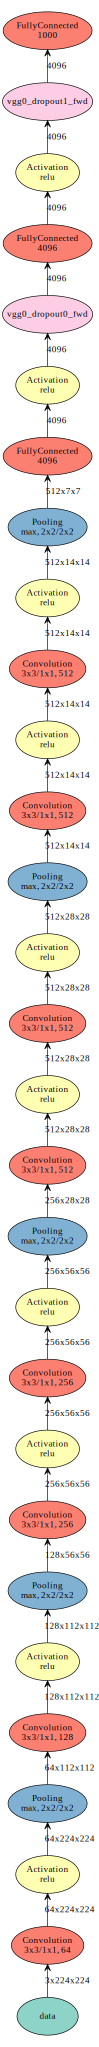

In [75]:
mx.viz.plot_network(vgg1(mx.sym.var('data')), shape={'data':(1,3,224,224)}, node_attrs={'shape':'oval', 'fixedsize':'false'})

In [76]:
mobile_net = mx.gluon.model_zoo.vision.mobilenet_v2_1_0(pretrained=True)

In [77]:
mobile_net

MobileNetV2(
  (features): HybridSequential(
    (0): Conv2D(3 -> 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=32)
    (2): RELU6(
    
    )
    (3): LinearBottleneck(
      (out): HybridSequential(
        (0): Conv2D(32 -> 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=32)
        (2): RELU6(
        
        )
        (3): Conv2D(1 -> 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (4): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=32)
        (5): RELU6(
        
        )
        (6): Conv2D(32 -> 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (7): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=16)

In [78]:
mobile_net.summary(nd.ones((1,3, 224,224)))

--------------------------------------------------------------------------------
        Layer (type)                                Output Shape         Param #
               Input                            (1, 3, 224, 224)               0
            Conv2D-1                           (1, 32, 112, 112)             864
         BatchNorm-2                           (1, 32, 112, 112)             128
             RELU6-3                           (1, 32, 112, 112)               0
            Conv2D-4                           (1, 32, 112, 112)            1024
         BatchNorm-5                           (1, 32, 112, 112)             128
             RELU6-6                           (1, 32, 112, 112)               0
            Conv2D-7                           (1, 32, 112, 112)             288
         BatchNorm-8                           (1, 32, 112, 112)             128
             RELU6-9                           (1, 32, 112, 112)               0
           Conv2D-10        

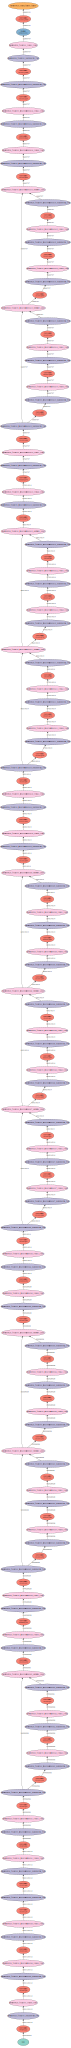

In [80]:
mx.viz.plot_network(mobile_net(mx.sym.var('data')), shape={'data':(1,3,224,224)}, node_attrs={'shape':'oval', 'fixedsize':'false'})

In [83]:
mobile_net.hybridize()
mobile_net(nd.ones((1,3,224,224)))
mobile_net.export('mobile_net')

In [84]:
from mxnet import metric

In [85]:
acc = metric.Accuracy()

In [86]:
l = nd.array([1,2,3])
pred = nd.array([1,2,3])
acc.update(l, pred)
acc.get()

('accuracy', 1.0)

In [87]:
acc.reset()
pred = nd.array([1,1,1])
acc.update(l,pred)
acc.get()

('accuracy', 0.3333333333333333)

In [88]:
top_2_acc = metric.TopKAccuracy(top_k=2)
pred = mx.nd.array([[0.4,0.5,0.1], [0.4,0.5,0.1], [0.4,0.5,0.1]])

labels = mx.nd.array([0,0,0])


acc.reset()
acc.update(labels, pred)
print(acc.get())

('accuracy', 0.0)


In [89]:
top_2_acc.update(labels, pred)
print(top_2_acc.get())

('top_k_accuracy_2', 1.0)


In [90]:
from mxnet.gluon import loss

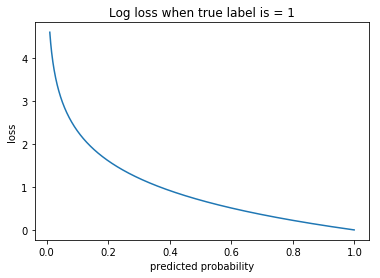

In [91]:
x = np.arange(0.01, 1, 0.001)
plt.plot(x, -np.log(x))
plt.title('Log loss when true label is = 1')
plt.xlabel("predicted probability")
o = plt.ylabel('loss')

In [92]:
nd.array([[1,2,3,5,6,7]]).softmax()


[[0.00161931 0.00440174 0.01196516 0.08841126 0.24032675 0.6532758 ]]
<NDArray 1x6 @cpu(0)>

In [93]:
nd.array([[1,2,3,5,6,7]]).softmax().sum()


[1.]
<NDArray 1 @cpu(0)>

In [96]:
loss = loss.KLDivLoss()
x = nd.ones((2,))
y = nd.ones((2,)) * 2
loss(x, y)


[-0.61370564 -0.61370564]
<NDArray 2 @cpu(0)>